# Part 1: Exploratory Data Analysis

Describe the data sufficiently using the methods and visualizations that we used previously in Module 3 and again this week.  Include any output, graphs, tables, heatmaps, box plots, etc.  Label your figures and axes.

Split data into training and test sets.  Use random_state = 42. Use 80% of the data for the training set.  Use the same split for all models.

In [261]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import sys
#read data from local data repository
housing2 = pd.read_csv("D:/UIUC_Course/Machine Learning/Homework04//housing2.csv")
#print(np.isnan(housing2).any())
df=housing2.drop(columns=['ATT1', 'ATT2', 'ATT3', 'ATT4', 'ATT5', 'ATT6', 'ATT7', 'ATT8', 'ATT9', 'ATT10', 'ATT11', 'ATT12', 'ATT13'])
print("Initial Size of housing2.csv:")
print(df.shape)
print("Check if NaN exists:")
print(np.isnan(df).any())
df.dropna(inplace=True)
print("Delete the row where NaN exists and check again:")
print(np.isnan(df).any())
df=pd.DataFrame(df)
print("Now the size of housing2.csv is" )
print(df.shape)
#print(type(df))
df.head()

Initial Size of housing2.csv:
(506, 14)
Check if NaN exists:
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV        True
dtype: bool
Delete the row where NaN exists and check again:
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool
Now the size of housing2.csv is
(452, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


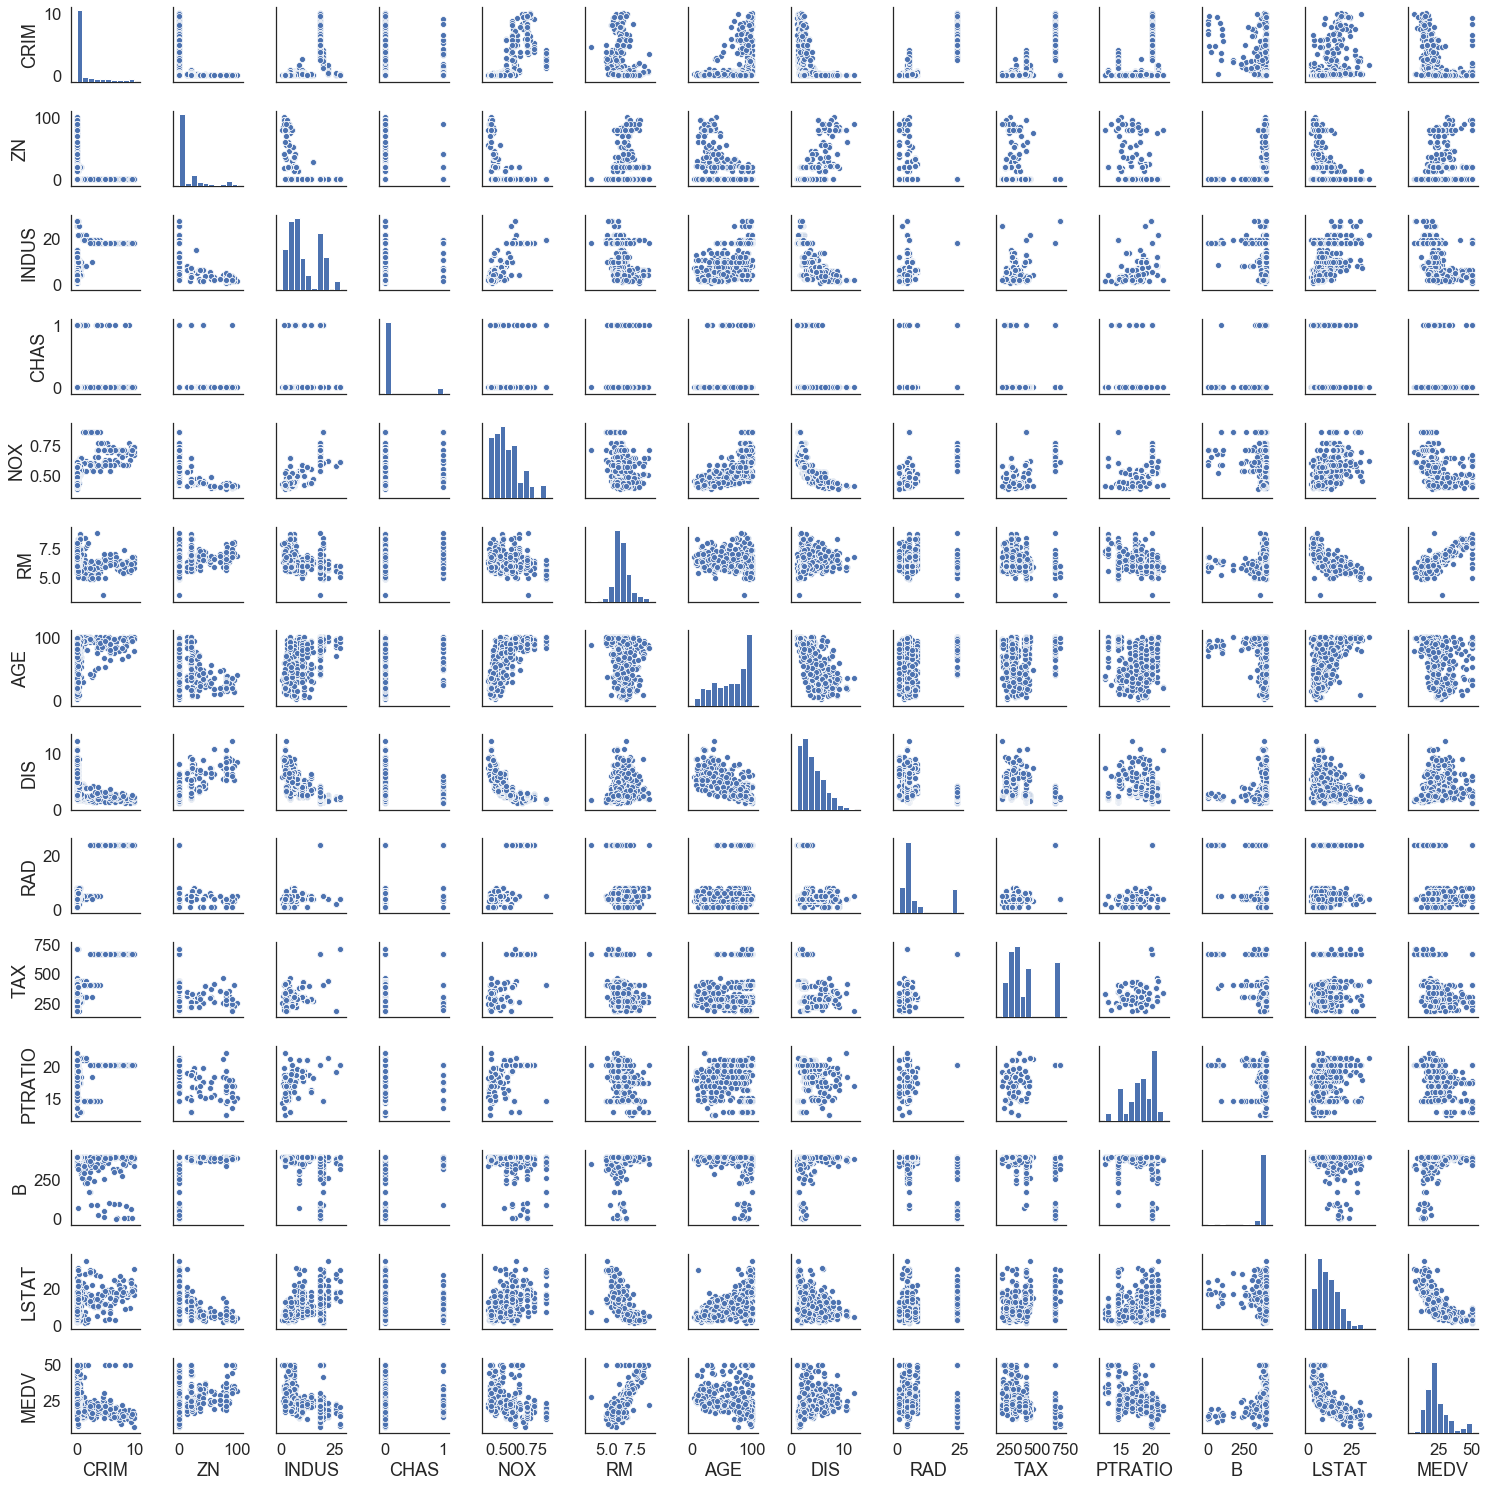

In [262]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#cols = ['INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT', 'MEDV']
sns.pairplot(df[cols], height=1.5)
#plt.xlabel('Feature name')
#plt.ylabel('Feature name')
#plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

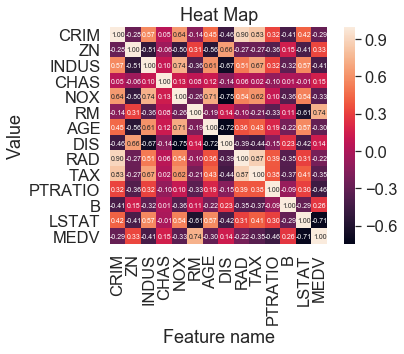

In [263]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',annot_kws={'size': 7}, yticklabels=cols,xticklabels=cols)
plt.xlabel('Feature name')
plt.ylabel('Value')
plt.title('Heat Map')
plt.show()

In [264]:
#print summary of data frame
summary = df.describe()
print("Statistic Description of housing2.csv")
print(summary)

Statistic Description of housing2.csv
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369

In [265]:
ncol=df.shape[1]
nrow=df.shape[0]
#print(nrow,ncol)


In [266]:
print("The number of values in each feature:")
type = [0]*3
colCounts = []

for col in range(ncol):
    for row in range(nrow):
        try:
            a = float(df.iloc[row,col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(df.iloc[row,col]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0]*3
sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' + str(types[1]) + '\t' + str(types[2]) + '\n')
    iCol += 1
    sys.stdout.write('\n')

The number of values in each feature:
Col#	Number	Strings	 Other
0	452	0	0

1	452	0	0

2	452	0	0

3	452	0	0

4	452	0	0

5	452	0	0

6	452	0	0

7	452	0	0

8	452	0	0

9	452	0	0

10	452	0	0

11	452	0	0

12	452	0	0

13	452	0	0



In [267]:
list1=list(range(0,14,1))
print(list1)
#zip1=zip(list,cols)
for i,j in zip(list1,cols):
    print(i,j)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
0 CRIM
1 ZN
2 INDUS
3 CHAS
4 NOX
5 RM
6 AGE
7 DIS
8 RAD
9 TAX
10 PTRATIO
11 B
12 LSTAT
13 MEDV


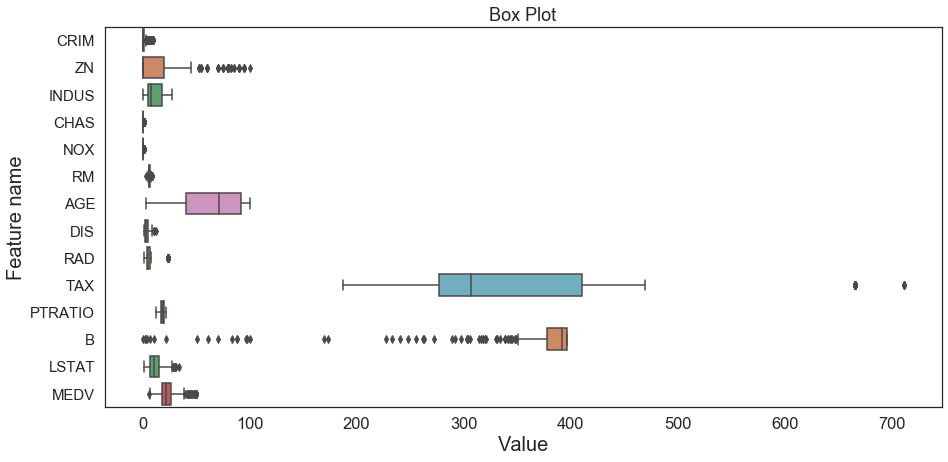

In [268]:
plt.figure(figsize=(15,7))
sns.set_style("white")
sns.boxplot(data=df, palette="deep",orient='h')
plt.ylabel('Feature name',fontsize=20.0)
plt.xlabel('Value',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.title('Box Plot')
plt.show()

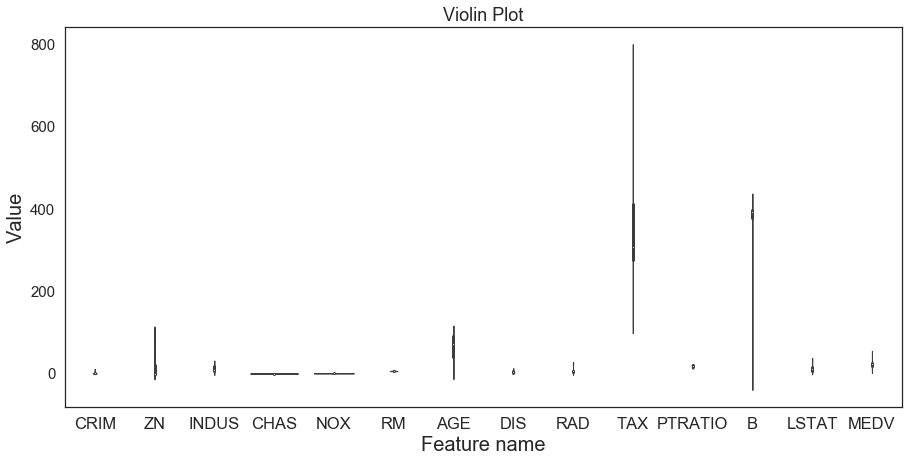

In [269]:
plt.figure(figsize=(15,7))
sns.violinplot(data=df,split=True,linewidth =1,width = 0.8,palette = 'muted')
plt.xlabel('Feature name',fontsize=20.0)
plt.ylabel('Value',fontsize=20.0)
plt.title('Violin Plot')
plt.yticks(fontsize=15.0)
plt.show()

# Part 2: Linear regression

Split data into training and test sets. Use random_state = 42. Use 80% of the data for the training set. Use the same split for all models.

Fit a linear model using SKlearn to all of the features of the dataset.  Describe the model (coefficients and y intercept), plot the residual errors, calculate performance metrics: MSE and R2.  

In [293]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [294]:
# Create the regressor: reg
slr = LinearRegression()
X = df.iloc[:,:-1].values
y = df['MEDV'].values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [447]:
# Fit the regressor to the training data
slr.fit(X_train,y_train)

# Predict on the test data: y_pred
y_test_pred = slr.predict(X_test)

# Predict on the train data: y_pred
y_train_pred = slr.predict(X_train)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
print('Slope coefficients:' + str(slr.coef_))
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

MSE train: 20.042, test: 20.975
R^2 train: 0.747, test: 0.698
Slope coefficients:[-2.10978212e-01  3.03333448e-02  5.21741626e-02  1.78646977e+00
 -1.16261232e+01  5.31801604e+00 -2.06780275e-02 -1.33978603e+00
  2.48794157e-01 -9.31036789e-03 -8.78367327e-01  1.36707717e-02
 -4.79318745e-01]
Slope: -0.211
Intercept: 20.400


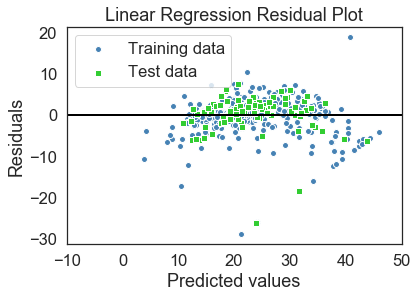

In [297]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Linear Regression Residual Plot')
plt.hlines(y=0, xmin=-10, xmax=50,color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

# Part 3.1: Ridge regression

Fit a Ridge model using SKlearn to all of the features of the dataset.  Test some settings for alpha.  Describe the model (coefficients and y intercept), plot the residual errors, calculate performance metrics: MSE and R2.  Which alpha gives the best performing model?

In [299]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [300]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

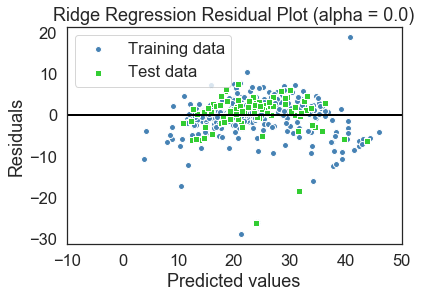

Slope: -0.211
y Intercept: 20.400
Ridge coefficients:[-2.10978212e-01  3.03333448e-02  5.21741626e-02  1.78646977e+00
 -1.16261232e+01  5.31801604e+00 -2.06780275e-02 -1.33978603e+00
  2.48794157e-01 -9.31036789e-03 -8.78367327e-01  1.36707717e-02
 -4.79318745e-01]
MSE train: 20.04244017622545
MSE test: 20.975274808977602
R^2 train: 0.7473120147155756
R^2 test: 0.6976755382220106


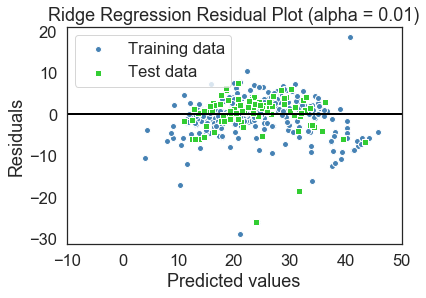

Slope: -0.176
y Intercept: 19.632
Ridge coefficients:[-1.76006486e-01  2.83458892e-02  4.08405695e-02  1.82482538e+00
 -1.09789932e+01  5.30485660e+00 -2.02272518e-02 -1.29342485e+00
  2.21213528e-01 -8.39079318e-03 -8.66122737e-01  1.36793033e-02
 -4.78024474e-01]
MSE train: 20.053044335298964
MSE test: 21.036014563018828
R^2 train: 0.7471783212347238
R^2 test: 0.6968000734847771


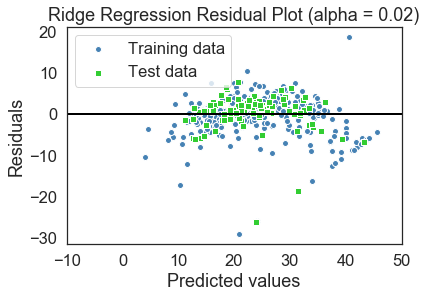

Slope: -0.151
y Intercept: 18.981
Ridge coefficients:[-1.50766625e-01  2.67260469e-02  3.15380735e-02  1.85581756e+00
 -1.03947720e+01  5.28834072e+00 -1.97573106e-02 -1.25073969e+00
  1.99747346e-01 -7.67247329e-03 -8.55282308e-01  1.36591170e-02
 -4.76308487e-01]
MSE train: 20.079208995764986
MSE test: 21.095204354329177
R^2 train: 0.7468484464649514
R^2 test: 0.6959469489386809


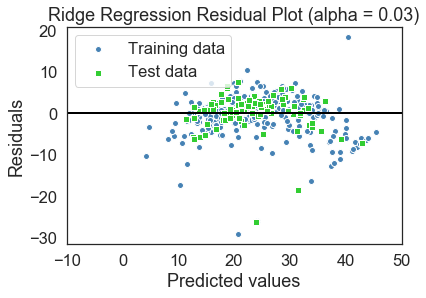

Slope: -0.132
y Intercept: 18.425
Ridge coefficients:[-1.31985266e-01  2.53758044e-02  2.37162134e-02  1.88149571e+00
 -9.86671467e+00  5.26932721e+00 -1.92850472e-02 -1.21128750e+00
  1.82521345e-01 -7.09570675e-03 -8.45513400e-01  1.36199588e-02
 -4.74315468e-01]
MSE train: 20.115624534012323
MSE test: 21.1536635984551
R^2 train: 0.746389332259702
R^2 test: 0.6951043540417237


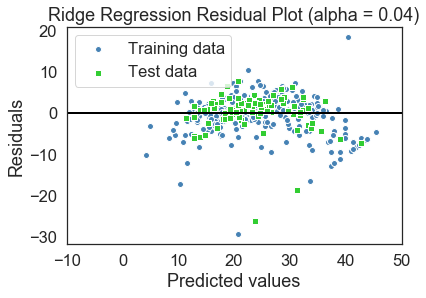

Slope: -0.118
y Intercept: 17.945
Ridge coefficients:[-1.17668447e-01  2.42310398e-02  1.70157661e-02  1.90316861e+00
 -9.38832456e+00  5.24841990e+00 -1.88201549e-02 -1.17469092e+00
  1.68358892e-01 -6.62248282e-03 -8.36589537e-01  1.35678728e-02
 -4.72134234e-01]
MSE train: 20.15933949665649
MSE test: 21.212152679607645
R^2 train: 0.7458381894976325
R^2 test: 0.6942613290925697


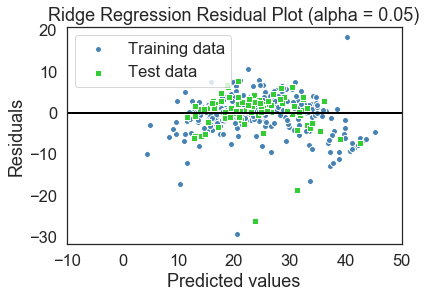

Slope: -0.107
y Intercept: 17.529
Ridge coefficients:[-1.06540899e-01  2.32475952e-02  1.11905356e-02  1.92171579e+00
 -8.95373386e+00  5.22605969e+00 -1.83682271e-02 -1.14062812e+00
  1.56483637e-01 -6.22738640e-03 -8.28349253e-01  1.35067933e-02
 -4.69822368e-01]
MSE train: 20.20857950665289
MSE test: 21.27123269611724
R^2 train: 0.7452173888959106
R^2 test: 0.693409786771634


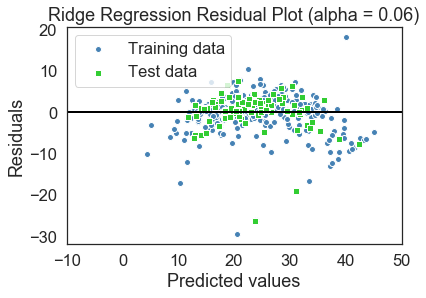

Slope: -0.098
y Intercept: 17.166
Ridge coefficients:[-9.77541997e-02  2.23937957e-02  6.06508233e-03  1.93775337e+00
 -8.55778358e+00  5.20257778e+00 -1.79324070e-02 -1.10882369e+00
  1.46362391e-01 -5.89274511e-03 -8.20673261e-01  1.34393811e-02
 -4.67418900e-01]
MSE train: 20.262206908798596
MSE test: 21.331279264541052
R^2 train: 0.7445412736082966
R^2 test: 0.6925443131773347


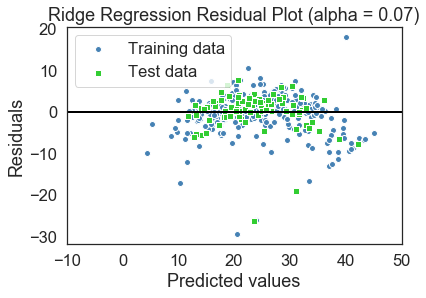

Slope: -0.091
y Intercept: 16.849
Ridge coefficients:[-9.07251757e-02  2.16461597e-02  1.51035774e-03  1.95172809e+00
 -8.19599011e+00  5.17822859e+00 -1.75143299e-02 -1.07904092e+00
  1.37616683e-01 -5.60587008e-03 -8.13470910e-01  1.33674930e-02
 -4.64951278e-01]
MSE train: 20.3194520181788
MSE test: 21.392525763633678
R^2 train: 0.7438195475495191
R^2 test: 0.6916615445346068


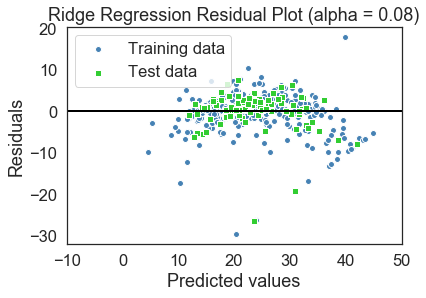

Slope: -0.085
y Intercept: 16.572
Ridge coefficients:[-8.50417928e-02  2.09868028e-02 -2.57109306e-03  1.96397352e+00
 -7.86447374e+00  5.15321103e+00 -1.71146867e-02 -1.05107542e+00
  1.29970332e-01 -5.35740394e-03 -8.06671719e-01  1.32924580e-02
 -4.62439403e-01]
MSE train: 20.379769832698464
MSE test: 21.455103816559937
R^2 train: 0.7430590819129139
R^2 test: 0.690759583709667


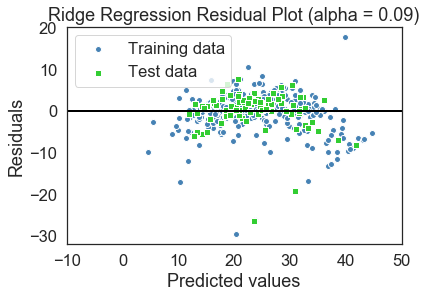

Slope: -0.080
y Intercept: 16.328
Ridge coefficients:[-8.04059966e-02  2.04017936e-02 -6.25451580e-03  1.97474509e+00
 -7.55987954e+00  5.12768289e+00 -1.67335715e-02 -1.02474991e+00
  1.23217008e-01 -5.14028839e-03 -8.00219843e-01  1.32152474e-02
 -4.59898073e-01]
MSE train: 20.442759023681347
MSE test: 21.51907461263
R^2 train: 0.7422649365082521
R^2 test: 0.6898375487581576


In [491]:
# Setup the array of alphas and lists to store scores
ridge_alpha_space = np.arange(0,0.1,0.01)
ridge_mes_train = []
ridge_mes_test = []
ridge_r2_train = []
ridge_r2_test = []
for a in ridge_alpha_space:
    ridge = Ridge(alpha=a, normalize=True)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    plt.scatter(y_train_pred,  y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10, 50])
    plt.title('Ridge Regression Residual Plot (alpha = ' + str(a) + ')')
    plt.show()
    
    print('Slope: %.3f' %ridge.coef_[0])
    print('y Intercept: %.3f' %ridge.intercept_)
    print('Ridge coefficients:' + str(ridge.coef_))
    mes_train = mean_squared_error(y_train, y_train_pred)
    mes_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print('MSE train: ' + str (mes_train))
    print('MSE test: ' + str (mes_test))
    print('R^2 train: ' + str (r2_train))
    print('R^2 test: ' + str (r2_test))
          
    ridge_mes_train.append(mes_train)
    ridge_mes_test.append(mes_test)
    ridge_r2_train.append(r2_train)
    ridge_r2_test.append(r2_test)

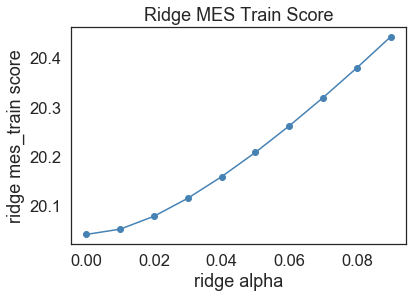

In [493]:
plt.xlabel('ridge alpha')
plt.ylabel('ridge mes_train score')
plt.title('Ridge MES Train Score')
plt.plot(ridge_alpha_space,ridge_mes_train,c='steelblue', marker='o',label='ridge_mes_train')
plt.show()

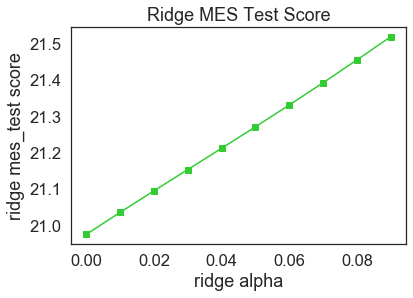

In [494]:
plt.xlabel('ridge alpha')
plt.ylabel('ridge mes_test score')
plt.title('Ridge MES Test Score')
#plt.plot(ridge_mes_train,ridge_alpha_space,c='steelblue', marker='o',label='ridge_mes_train')
plt.plot(ridge_alpha_space,ridge_mes_test,c='limegreen', marker='s',label='ridge_mes_test')
plt.show()

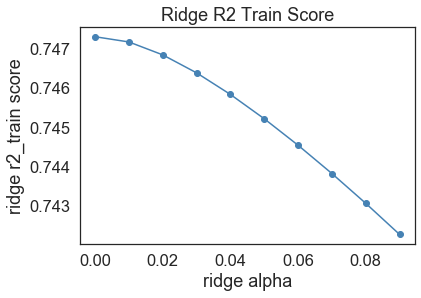

In [495]:
plt.xlabel('ridge alpha')
plt.ylabel('ridge r2_train score')
plt.title('Ridge R2 Train Score')
plt.plot(ridge_alpha_space,ridge_r2_train,c='steelblue', marker='o',label='ridge_r2_train')
plt.show()

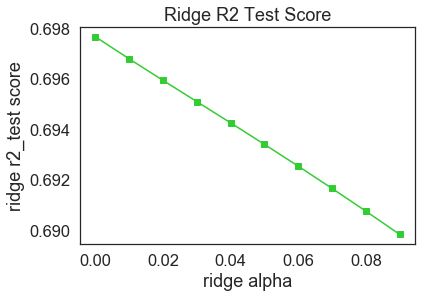

In [496]:
plt.xlabel('ridge alpha')
plt.ylabel('ridge r2_test score')
plt.title('Ridge R2 Test Score')
plt.plot(ridge_alpha_space,ridge_r2_test,c='limegreen', marker='s',label='ridge_r2_test')
plt.show()

# Part 3.2: LASSO regression

Fit a LASSO model using SKlearn to all of the features of the dataset.  Test some settings for alpha.  Describe the model (coefficients and y intercept), plot the residual errors, calculate performance metrics: MSE and R2.  Which alpha gives the best performing model?

In [497]:
# Import Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [498]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

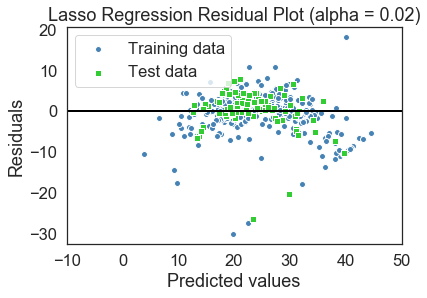

Slope: -0.080
y Intercept: 5.395
Ridge coefficients:[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  8.67672140e-01
 -0.00000000e+00  5.48500992e+00 -0.00000000e+00 -3.28367832e-01
 -0.00000000e+00 -3.39632034e-04 -7.14004384e-01  1.01957639e-02
 -5.01913775e-01]
MSE train: 22.314985364476563
MSE test: 23.359229480305512
R^2 train: 0.7186605700792004
R^2 test: 0.6633147100814487


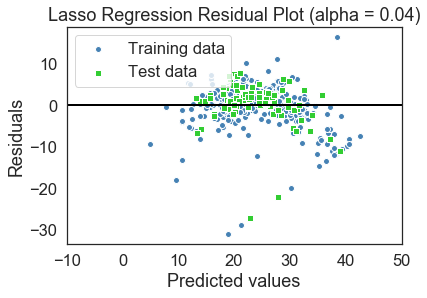

Slope: -0.080
y Intercept: 4.135
Ridge coefficients:[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.38062578e+00 -0.00000000e+00 -9.57349422e-03
 -0.00000000e+00 -0.00000000e+00 -6.11604406e-01  4.82093681e-03
 -4.38059480e-01]
MSE train: 24.602607202827922
MSE test: 25.586425282654144
R^2 train: 0.6898190443795826
R^2 test: 0.6312133060068259


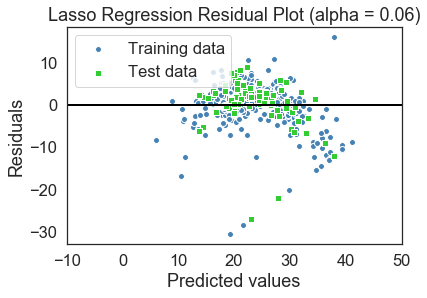

Slope: -0.080
y Intercept: 5.251
Ridge coefficients:[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.09506970e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.94226533e-01  3.32556945e-04
 -4.21840953e-01]
MSE train: 26.28240205880278
MSE test: 26.911283810526854
R^2 train: 0.6686407859382313
R^2 test: 0.6121176257347533


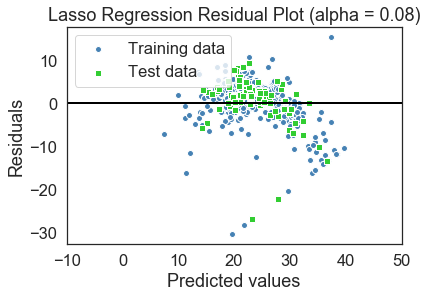

Slope: -0.080
y Intercept: 4.437
Ridge coefficients:[-0.          0.         -0.          0.         -0.          4.84489745
 -0.         -0.         -0.         -0.         -0.37462262  0.
 -0.39116737]
MSE train: 28.022435616839545
MSE test: 28.414967655525206
R^2 train: 0.6467030592821149
R^2 test: 0.590444469446531


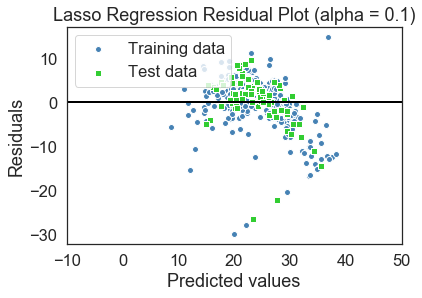

Slope: -0.080
y Intercept: 3.462
Ridge coefficients:[-0.          0.         -0.          0.         -0.          4.59795918
 -0.         -0.         -0.         -0.         -0.25483183  0.
 -0.35920906]
MSE train: 30.210513479845122
MSE test: 30.298910319131824
R^2 train: 0.6191165487581027
R^2 test: 0.563290500929671


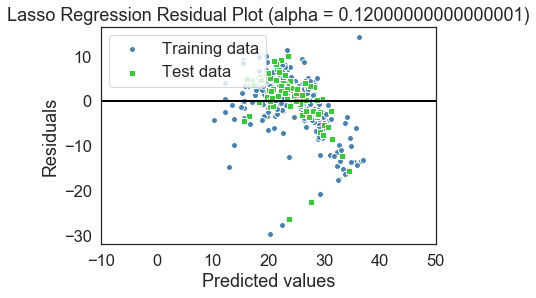

Slope: -0.080
y Intercept: 2.486
Ridge coefficients:[-0.          0.         -0.          0.         -0.          4.35114794
 -0.         -0.         -0.         -0.         -0.1350514   0.
 -0.32724121]
MSE train: 32.884609497387935
MSE test: 32.5846043963607
R^2 train: 0.5854024935238737
R^2 test: 0.5303459393932666


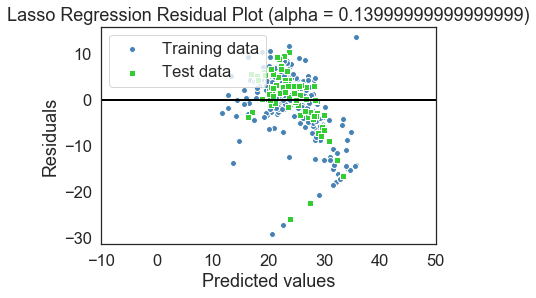

Slope: -0.080
y Intercept: 1.511
Ridge coefficients:[-0.          0.         -0.          0.         -0.          4.10418363
 -0.         -0.         -0.         -0.         -0.01525849  0.
 -0.29528486]
MSE train: 36.04520965328035
MSE test: 35.272300708845975
R^2 train: 0.5455547664676914
R^2 test: 0.49160716965152196


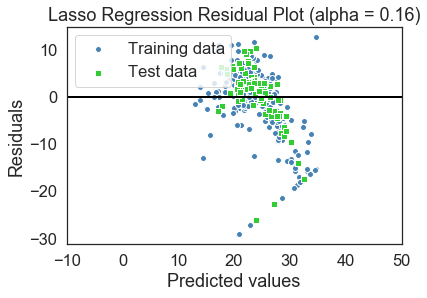

Slope: -0.080
y Intercept: 2.898
Ridge coefficients:[-0.          0.         -0.          0.         -0.          3.77529569
 -0.          0.         -0.         -0.         -0.          0.
 -0.25832079]
MSE train: 38.857411835866564
MSE test: 37.78086596751099
R^2 train: 0.510099517631619
R^2 test: 0.45545028262297815


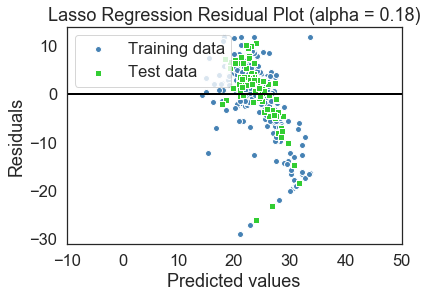

Slope: -0.080
y Intercept: 4.629
Ridge coefficients:[-0.          0.         -0.          0.         -0.          3.43458596
 -0.          0.         -0.         -0.         -0.          0.
 -0.22061663]
MSE train: 41.915383556362215
MSE test: 40.46742817372688
R^2 train: 0.4715456935306299
R^2 test: 0.4167278591780338


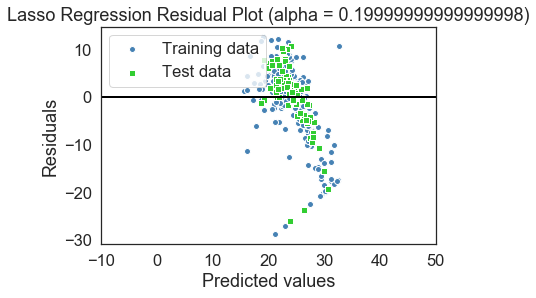

Slope: -0.080
y Intercept: 6.361
Ridge coefficients:[-0.          0.         -0.          0.         -0.          3.09374681
 -0.          0.         -0.         -0.         -0.          0.
 -0.18292114]
MSE train: 45.333372002779086
MSE test: 43.407568552862095
R^2 train: 0.42845290609274944
R^2 test: 0.3743505189158056


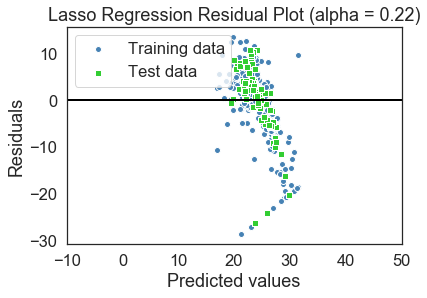

Slope: -0.080
y Intercept: 8.093
Ridge coefficients:[-0.          0.         -0.          0.         -0.          2.75292958
 -0.          0.         -0.         -0.         -0.          0.
 -0.14522418]
MSE train: 49.11111130854359
MSE test: 46.60115967630962
R^2 train: 0.3808245072695484
R^2 test: 0.32832009851235056


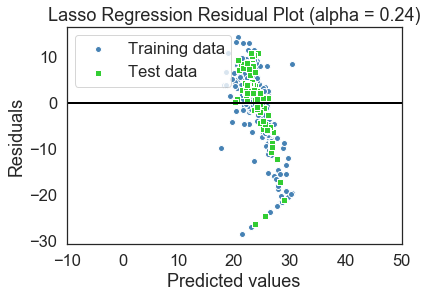

Slope: -0.080
y Intercept: 9.825
Ridge coefficients:[-0.          0.         -0.          0.         -0.          2.41211235
 -0.          0.         -0.         -0.         -0.          0.
 -0.10752721]
MSE train: 53.248642568421396
MSE test: 50.048221179464704
R^2 train: 0.3286599789527801
R^2 test: 0.2786363149553911


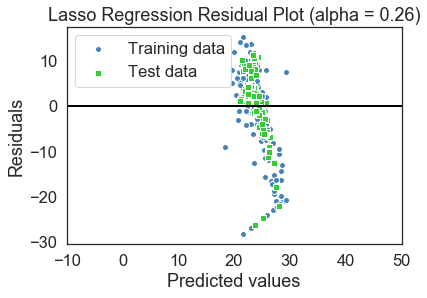

Slope: -0.080
y Intercept: 11.557
Ridge coefficients:[-0.          0.         -0.          0.         -0.          2.07129513
 -0.          0.         -0.         -0.         -0.          0.
 -0.06983025]
MSE train: 57.74596578241254
MSE test: 53.74875306232738
R^2 train: 0.2719593211424438
R^2 test: 0.22529916824492657


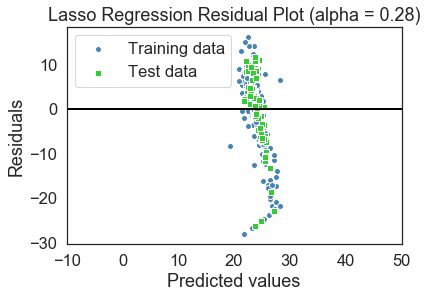

Slope: -0.080
y Intercept: 13.288
Ridge coefficients:[-0.          0.         -0.          0.         -0.          1.73051419
 -0.          0.         -0.         -0.         -0.          0.
 -0.03213086]
MSE train: 62.60297512617839
MSE test: 57.70270559925479
R^2 train: 0.21072386803431065
R^2 test: 0.1683093750952004


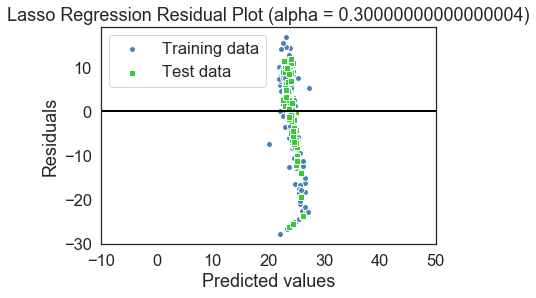

Slope: -0.080
y Intercept: 15.278
Ridge coefficients:[-0.          0.         -0.          0.         -0.          1.35921339
 -0.          0.         -0.         -0.         -0.          0.
 -0.        ]
MSE train: 67.66360770491573
MSE test: 61.73211368073928
R^2 train: 0.14692120531748543
R^2 test: 0.11023201302901742


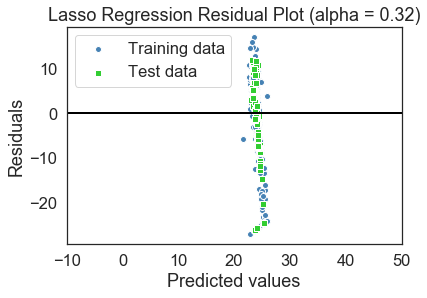

Slope: -0.080
y Intercept: 18.753
Ridge coefficients:[-0.          0.         -0.          0.         -0.          0.81209883
 -0.          0.         -0.         -0.         -0.          0.
 -0.        ]
MSE train: 72.14000770491573
MSE test: 64.9405095654687
R^2 train: 0.0904843399766595
R^2 test: 0.06398820607749278


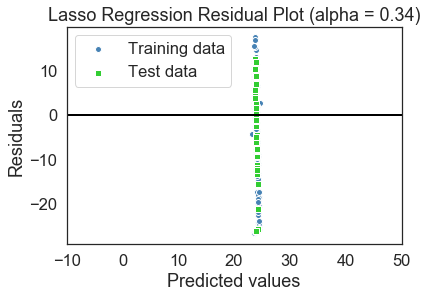

Slope: -0.080
y Intercept: 22.229
Ridge coefficients:[-0.          0.         -0.          0.         -0.          0.26498427
 -0.          0.         -0.         -0.         -0.          0.
 -0.        ]
MSE train: 76.90520770491574
MSE test: 68.32268976909899
R^2 train: 0.030406386549328368
R^2 test: 0.01523958089804811


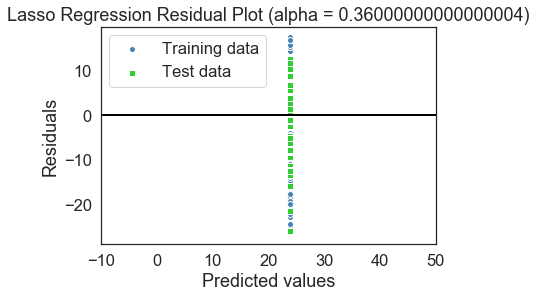

Slope: -0.080
y Intercept: 23.912
Ridge coefficients:[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
MSE train: 79.31694953230868
MSE test: 70.02325015719849
R^2 train: 0.0
R^2 test: -0.009271230461290969


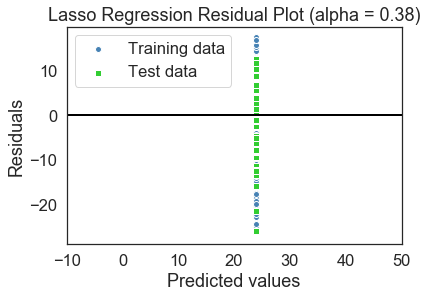

Slope: -0.080
y Intercept: 23.912
Ridge coefficients:[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
MSE train: 79.31694953230868
MSE test: 70.02325015719849
R^2 train: 0.0
R^2 test: -0.009271230461290969


In [492]:
# Setup the array of alphas and lists to store scores
lasso_alpha_space = np.arange(0.02,0.4,0.02)
lasso_mes_train = []
lasso_mes_test = []
lasso_r2_train = []
lasso_r2_test = []
for a in lasso_alpha_space:
    lasso = Lasso(alpha=a, normalize=True)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    plt.scatter(y_train_pred,  y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10, 50])
    plt.title('Lasso Regression Residual Plot (alpha = ' + str(a) + ')')
    plt.show()
    
    print('Slope: %.3f' %ridge.coef_[0])
    print('y Intercept: %.3f' %lasso.intercept_)
    print('Ridge coefficients:' + str(lasso.coef_))
    mes_train = mean_squared_error(y_train, y_train_pred)
    mes_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print('MSE train: ' + str (mes_train))
    print('MSE test: ' + str (mes_test))
    print('R^2 train: ' + str (r2_train))
    print('R^2 test: ' + str (r2_test))
          
    lasso_mes_train.append(mes_train)
    lasso_mes_test.append(mes_test)
    lasso_r2_train.append(r2_train)
    lasso_r2_test.append(r2_test)

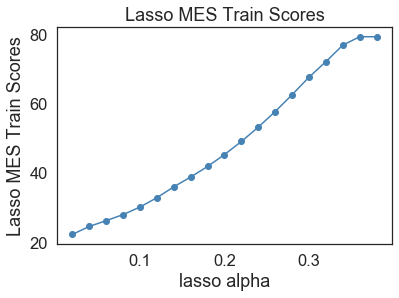

In [499]:
plt.xlabel('lasso alpha')
plt.ylabel('Lasso MES Train Scores')
plt.title('Lasso MES Train Scores')
plt.plot(lasso_alpha_space,lasso_mes_train,c='steelblue', marker='o',label='lasso_mes_train')
#plt.plot(lasso_alpha_space,lasso_mes_test,c='limegreen', marker='s',label='lasso_mes_test')
plt.show()

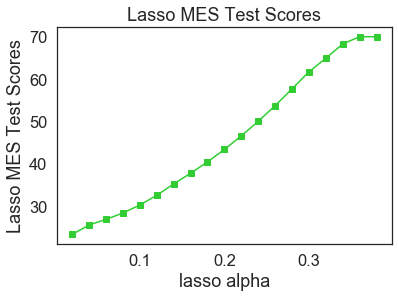

In [500]:
plt.xlabel('lasso alpha')
plt.ylabel('Lasso MES Test Scores')
plt.title('Lasso MES Test Scores')
#plt.plot(lasso_r2_train,lasso_alpha_space,c='steelblue', marker='o',label='lasso_r2_train')
plt.plot(lasso_alpha_space,lasso_mes_test,c='limegreen', marker='s',label='lasso_r2_test')
plt.show()

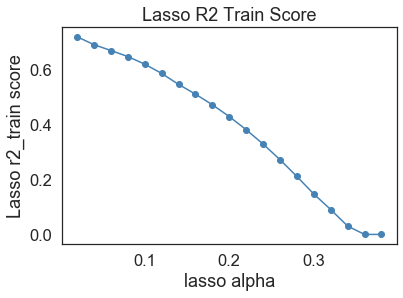

In [501]:
plt.xlabel('lasso alpha')
plt.ylabel('Lasso r2_train score')
plt.title('Lasso R2 Train Score')
plt.plot(lasso_alpha_space,lasso_r2_train,c='steelblue', marker='o',label='ridge_r2_train')
#plt.plot(ridge_r2_test,c='limegreen', marker='s',label='ridge_r2_test')
plt.show()

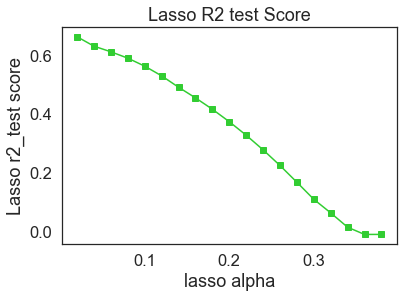

In [502]:
plt.xlabel('lasso alpha')
plt.ylabel('Lasso r2_test score')
plt.title('Lasso R2 test Score')
plt.plot(lasso_alpha_space,lasso_r2_test,c='limegreen', marker='s',label='ridge_r2_test')
plt.show()

In [503]:
print("My name is Jialing Zhu")
print("My NetID is: jz72")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jialing Zhu
My NetID is: jz72
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
